In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,23.0,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,NaN,4.0
342,85.0,52.0,NaN,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,6.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	16
float64		column 2	16
float64		column 3	19
float64		column 4	16
float64		column 5	17
float64		column 6	19


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,329.000000,329.000000,326.000000,329.000000,328.000000,326.000000
mean,90.155015,69.896657,30.098160,24.699088,37.637195,3.481595
std,4.488160,18.407522,19.338512,10.163782,38.482365,3.371550
min,65.000000,23.000000,4.000000,8.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,25.000000,23.000000,24.000000,3.000000
75%,93.000000,80.000000,33.750000,27.000000,43.250000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

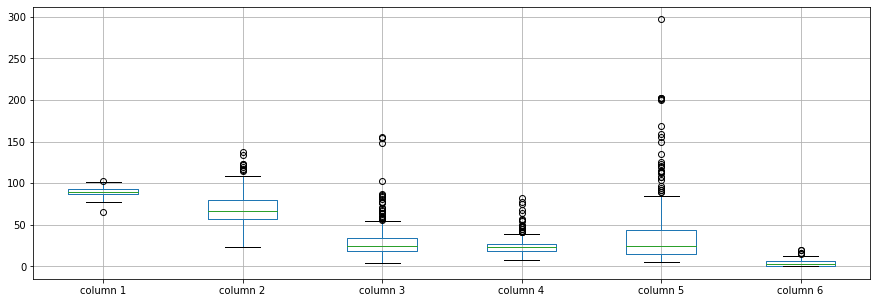

In [26]:
df.boxplot(return_type='axes', figsize=(15,5
                                       ))

In [27]:
df.mean()

column 1    90.155015
column 2    69.896657
column 3    30.098160
column 4    24.699088
column 5    37.637195
column 6     3.481595
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.011695,0.127464,0.192795,0.227548,0.330319
column 2,0.011695,1.000000,0.055454,0.148308,0.121632,0.065023
column 3,0.127464,0.055454,1.000000,0.771151,0.511705,0.202305
column 4,0.192795,0.148308,0.771151,1.000000,0.552475,0.270941
column 5,0.227548,0.121632,0.511705,0.552475,1.000000,0.329868
column 6,0.330319,0.065023,0.202305,0.270941,0.329868,1.000000


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [6,6+10,6+10+10,6+10+10+10,6+10+10+10+10,6+10+10+10,6+10+10,6+10,6], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 262.6693086170015
Epoch: 1 , loss: 264.0057293119885
Epoch: 2 , loss: 264.67232477097286
Epoch: 3 , loss: 264.6014600481306
Epoch: 4 , loss: 267.6645326160249
Epoch: 5 , loss: 266.8699515206473
Epoch: 6 , loss: 266.6472850981213
Epoch: 7 , loss: 265.5902353922526
Epoch: 8 , loss: 264.10508728027344
Epoch: 9 , loss: 266.40771048409596
Epoch: 10 , loss: 266.712892804827
Epoch: 11 , loss: 266.662350609189
Epoch: 12 , loss: 265.89021737234935
Epoch: 13 , loss: 266.463379632859
Epoch: 14 , loss: 268.0558130173456
Epoch: 15 , loss: 262.71136765252976
Epoch: 16 , loss: 267.1392640613374
Epoch: 17 , loss: 266.3014170328776
Epoch: 18 , loss: 266.0573083786737
Epoch: 19 , loss: 266.2260524204799
Epoch: 20 , loss: 266.0033874511719
Epoch: 21 , loss: 266.7655755905878
Epoch: 22 , loss: 265.77120681036087
Epoch: 23 , loss: 264.99175807407926
Epoch: 24 , loss: 263.90955825079055
Epoch: 25 , loss: 265.7747526622954
Ep

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
340,0.0,0.0,0.000000,0.000000,0.000000,0.0
341,0.0,0.0,0.000000,0.000000,-13.942154,0.0
342,0.0,0.0,-21.947001,0.000000,0.000000,0.0
343,0.0,0.0,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

584.4599675522533

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [39]:
NRMS=numerator/denominator
NRMS


0.23195045652157173

In [40]:
new_df.iloc[66,:]

column 1    86.000000
column 2     0.046259
column 3    20.000000
column 4    21.000000
column 5    16.000000
column 6     2.000000
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.000000,27.000000,31.000000,0.0
1,85.0,64.0,59.000000,32.000000,23.000000,0.0
2,86.0,54.0,33.000000,16.000000,54.000000,0.0
3,91.0,78.0,34.000000,24.000000,36.000000,0.0
4,98.0,55.0,13.000000,17.000000,17.000000,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.000000,22.000000,35.000000,4.0
341,89.0,48.0,32.000000,22.000000,0.057846,4.0
342,85.0,52.0,0.052999,23.000000,34.000000,4.0
343,95.0,93.0,21.000000,27.000000,47.000000,6.0


In [42]:
imputations[-1].to_excel("Bupa_C_5(imp).xlsx", index=False, header=False)